In [50]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt

banks=pd.read_csv("./banks-1.csv")
banks.head(5)


,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [51]:
def sigmoid_func(z):
    h= 1/(1+np.exp(-z))
    return h


In [52]:
def z_value(weights_list, f_val_list):
    z=0
    for j in range(len(weights_list)):
        if j==0:
            z=weights_list[j]
        else:
            z += weights_list[j]*f_val_list[j-1]
    return z

In [53]:
def cost_func(banks, weights_list, features_list, label):
    c = 0
    for i in range(len(banks)):
        f_val_list = list(banks.loc[i, features_list])
        val = z_value(weights_list, f_val_list)
        pred = sigmoid_func(val)
        label_iter = banks.loc[i, label]
        c += (label_iter * np.log(pred) + ((1 - label_iter) * np.log(1 - pred)))
    return (-c / len(banks))
a=cost_func(banks, [0,0,0], ["TotLns&Lses/Assets", "TotExp/Assets"] , "Financial Condition")
a

0.6931471805599453

In [54]:
def gradient_descent(banks, weights_list, features_list, label):
    gradient = []
    for f in range(len(features_list)):
        grad = 0
        for i in range(len(banks)):
            f_val_list = list(banks.loc[i, features_list])
            val = z_value(weights_list, f_val_list)
            pred = sigmoid_func(val)
            diff = (pred - banks.loc[i, label])
            grad += diff * banks.iloc[i, f]
        gradient.append(grad / len(banks))
    
    diff = (pred - banks.loc[i, label])
    grad_init = np.mean(diff)
    return grad_init, gradient
w=gradient_descent(banks, [0,0,0],["TotLns&Lses/Assets", "TotExp/Assets"], "Financial Condition")
w

(0.5, [2.5, -0.25])

In [55]:
def update_weight(alpha, weights_list, gradient_initial, gradient):
    for a in range(len(weights_list)):
        if a == 0:
            weights_list[a] = weights_list[a] - (alpha * gradient_initial)
        else:
            weights_list[a] = weights_list[a] - (alpha * gradient[a - 1])
    return weights_list
update_weight(0.01, [0,0,0], 0, [2.5, -0.25])

[0.0, -0.025, 0.0025]

In [56]:
def plot_cost_over_time(cost_list):
    plt.plot(cost_list)
    plt.title('Cost over Time')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

In [57]:
def cost_compare(cost_list, threshold):
    l=len(cost_list)
    if (cost_list[l-1]-cost_list[l-2]>=threshold):
        return True
    else: 
        return False
    

In [58]:
def main_iterate(banks, features_list, label, alpha, threshold=0.001):
    weight_initial = [1, 1, 1]
    cost_list = []
    cost = cost_func(banks, weight_initial, features_list, label)
    cost_list.append(cost)
    i=0
    while True:
        i += 1
#         print(cost)
        grad = gradient_descent(banks, weight_initial, features_list, label)
        new_weight = update_weight(alpha, weight_initial, grad[0], grad[1])
        new_cost = cost_func(banks, new_weight, features_list, label)
        cost_diff = cost - new_cost
        if cost_diff <= threshold or cost < new_cost:
            break
        cost = new_cost
        cost_list.append(cost)
        weight_initial = new_weight 

    return new_weight, cost_list, i

m = main_iterate(banks, ["TotExp/Assets", "TotLns&Lses/Assets"], "Financial Condition", 0.01)

weights_list=m[0]
cost_list=m[1]
print(cost_list)


[0.9819805205352429, 0.9774956038895537, 0.9730502702105538, 0.9686446194606013, 0.9642787457372665, 0.9599527372109792, 0.9556666760659805, 0.9514206384446547, 0.9472146943953167, 0.9430489078235217, 0.9389233364469647, 0.9348380317540277, 0.9307930389660338, 0.9267883970032587, 0.9228241384547458, 0.9189002895519671, 0.9150168701463688, 0.9111738936908326, 0.9073713672250763, 0.9036092913650233, 0.8998876602961499, 0.8962064617708266, 0.8925656771096566, 0.8889652812068144, 0.8854052425393769, 0.8818855231806431, 0.8784060788174191, 0.8749668587712535, 0.8715678060235976, 0.8682088572448559, 0.864889942827294, 0.8616109869217622, 0.8583719074781889, 0.8551726162897915, 0.8520130190409538, 0.8488930153587033, 0.8458124988677295, 0.8427713572488731, 0.8397694723010088, 0.8368067200062537, 0.8338829705984088, 0.8309980886345597, 0.8281519330697418, 0.8253443573345806, 0.8225752094158141, 0.8198443319395972, 0.8171515622574896, 0.8144967325350236, 0.8118796698427488, 0.8093001962496433, 

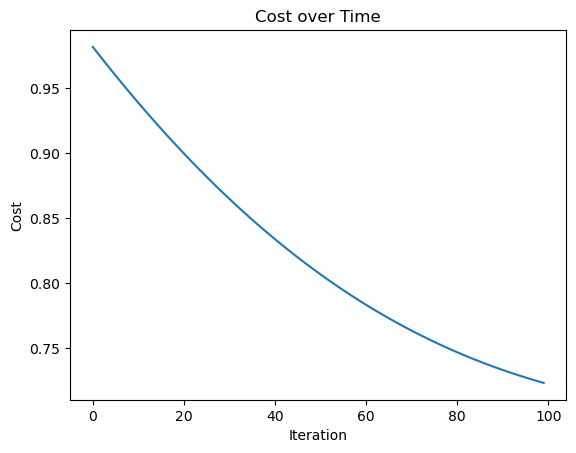

In [59]:
plot_cost_over_time(cost_list)